In [77]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.decomposition import PCA
from IPython.display import clear_output

In [113]:
iris = pd.read_csv("C:/Users/Codenester/Downloads/data/iris.csv")
data = iris[['SepalLength','SepalWidth','PetalLength','PetalWidth']]
#iris = iris.to_numpy()
#data = iris[['SepalLength','PetalLength']]#.to_numpy()

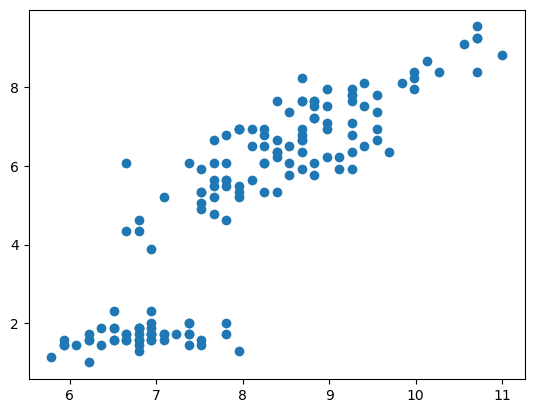

In [114]:
plt.scatter(X[:,0],X[:,1])
#plt.scatter(data[:,0],data[:,1])
plt.show()

In [115]:
data = ((data - data.min()) / (data.max() - data.min())) * 10 + 1

In [116]:
def random_centroids(data, k):
    centroids = []
    for i in range(k):
        centroid = data.apply(lambda x: float(x.sample()))
        centroids.append(centroid)
    return pd.concat(centroids, axis=1)

In [117]:
centroids = random_centroids(data, 3)
centroids

,0,1,2
SepalLength,4.611111,6.555556,4.333333
SepalWidth,5.166667,8.916667,4.750000
PetalLength,8.457627,8.966102,7.949153
PetalWidth,1.416667,5.583333,7.666667


In [118]:
def get_labels(data, centroids):
    distances = centroids.apply(lambda x: np.sqrt(((data - x) ** 2).sum(axis=1)))
    return distances.idxmin(axis=1)

In [119]:
labels = get_labels(data, centroids)

In [120]:
labels.value_counts()

2    94
0    49
1     7
dtype: int64

In [121]:
def new_centroids(data, labels, k):
    centroids = data.groupby(labels).apply(lambda x: np.exp(np.log(x).mean())).T
    return centroids

In [122]:
def plot_clusters(data, labels, centroids, iteration):
    pca = PCA(n_components=2)
    data_2d = pca.fit_transform(data)
    centroids_2d = pca.transform(centroids.T)
    clear_output(wait=True)
    plt.title(f'Iteration {iteration}')
    plt.scatter(x=data_2d[:,0], y=data_2d[:,1], c=labels)
    plt.scatter(x=centroids_2d[:,0], y=centroids_2d[:,1])
    plt.show()

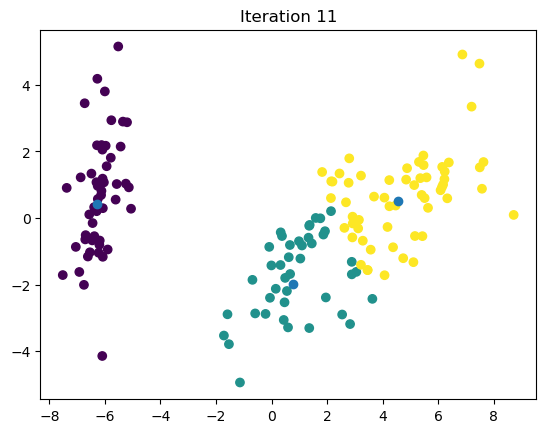

In [127]:
max_iterations = 100
centroid_count = 3

centroids = random_centroids(data, centroid_count)
old_centroids = pd.DataFrame()
iteration = 1

while iteration < max_iterations and not centroids.equals(old_centroids):
    old_centroids = centroids
    
    labels = get_labels(data, centroids)
    centroids = new_centroids(data, labels, centroid_count)
    plot_clusters(data, labels, centroids, iteration)
    iteration += 1

## Applying Algorithm to an image
### First upload an image

In [128]:
# Load an image of a bird
original_img = plt.imread('C:/Users/Codenester/Downloads/my pic.jpg')
#C:\Users\Codenester\Downloads\my pic.jpg

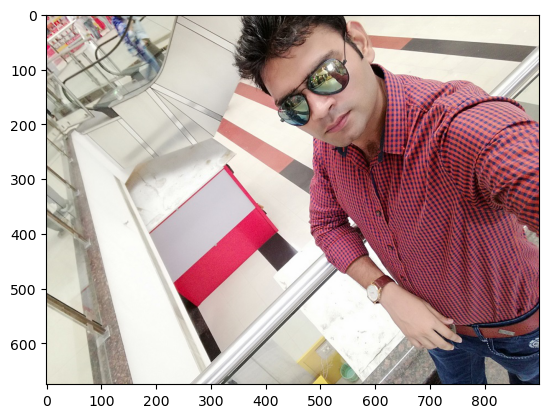

In [129]:
plt.imshow(original_img)

In [130]:
print("Shape of original_img is:", original_img.shape)

Shape of original_img is: (675, 900, 3)


In [141]:
# Divide by 255 so that all values are in the range 0 - 1
original_img = original_img / 255

# Reshape the image into an m x 3 matrix where m = number of pixels
# (in this case m = 128 x 128 = 16384)
# Each row will contain the Red, Green and Blue pixel values
# This gives us our dataset matrix X_img that we will use K-Means on.

X_img = np.reshape(original_img, (original_img.shape[0] * original_img.shape[1], 3))

In [143]:
# Run your K-Means algorithm on this data
# You should try different values of K and max_iters here
K = 16                       
iteration = 10               

# Using the function you have implemented above. 
initial_centroids = get_labels(data, centroids) 

# Run K-Means - this takes a couple of minutes
centroids, idx = plot_clusters(data, initial_centroids, iteration) 
#new = random_centroids(X_img, initial_centroids, max_iters)

TypeError: plot_clusters() missing 1 required positional argument: 'iteration'